In [1]:
# 1) Design Model (input size, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute predicition
#    - backward pass: gradients
#    - update weights

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# 0) prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(Y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [4]:
# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    optimizer.zero_grad() # Never forget this
    
    if (epoch+1)%10==0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4433.1377
epoch: 20, loss = 3307.4197
epoch: 30, loss = 2492.6160
epoch: 40, loss = 1902.2410
epoch: 50, loss = 1474.0647
epoch: 60, loss = 1163.2490
epoch: 70, loss = 937.4402
epoch: 80, loss = 773.2653
epoch: 90, loss = 653.8182
epoch: 100, loss = 566.8582


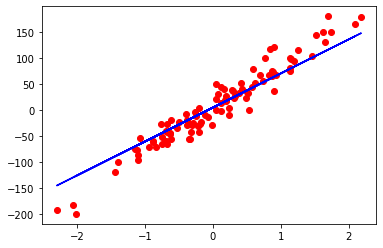

In [6]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
